### creates 32 unique adversarial patch attacks on road sign dataset.
Files needed:
* Patch #1
* Patch #2
* Clean road sign dataset
* Optional (to test individually): noturn.jpg

In [ ]:
import zipfile
import os
import shutil
from PIL import Image
import random

In [ ]:
#add a patch to one image to test
#rotate patch, change location, other funky things

In [ ]:
sign = Image.open('stop_clean.jpg')
nsign = sign.resize((256,256))

patch = Image.open('adv_patch_1.png')
npatch = patch.resize((30,50))

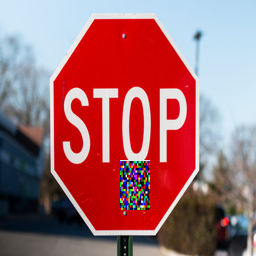

In [ ]:
nsign.paste(npatch, (120,160), mask=npatch)
nsign.show()

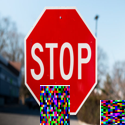

In [ ]:
rotpatch = npatch.rotate(90, expand=True)
nsign.paste(rotpatch, (100,100))
nsign.show()

In [ ]:
#unzip dataset
#put all files into one folder
#look at some images, see if we need to crop (pls god no)

In [ ]:
rdsigns = 'categorical_traffic.zip'
rdsigns_ref = zipfile.ZipFile(rdsigns, 'r')
rdsigns_ref.extractall()

In [ ]:
rdsigns_ref.close()

In [ ]:
#all clean in "images" folder
#ummmmm def need to crop -_-

In [ ]:
#extracting all images from label folders

#os.mkdir('tests')
#os.mkdir('images')
i = 1
for c in range (0, 57):
  data_path = os.path.join('traffic_Data/DATA',str(c))
  for filename in os.scandir(data_path):
      name = 'img'+ str(i)+'.png'
      new_path = 'images/' + name
      clean_sign = Image.open(filename.path)
      clean_sign = clean_sign.resize((125,125))
      clean_sign.save(name, 'png')
      shutil.move(name, new_path)
      i += 1

print(i)

4165


In [ ]:
i = 4165

for filename in os.scandir('TEST'):
  name = 'img'+ str(i)+'.png'
  new_path = 'images/' + name
  clean_sign = Image.open(filename.path)
  clean_sign = clean_sign.resize((125,125))
  clean_sign.save(name, 'png')
  shutil.move(name, new_path)
  i += 1

print(i)

6159


In [ ]:
c=1
for filename in os.scandir('images'):
    if filename.is_file():
      c += 1

print(c)

6159


In [ ]:
#create a copy of each image
#add patch to copy, move into attack folder
#train test split

In [ ]:
#32 different combos
import itertools

In [ ]:
patches = ['adv_patch_1.png', 'adv_patch2.png']
angles = [0, 45, 90, 135]
location = [(40, 40), (75, 40), (40, 75), (75, 75)]

combos = itertools.product(patches, angles, location)
combinations = []

for c in combos:
  print(c)
  combinations.append(c)
  #print(elements)
  #for i in c:
    #print(i)

print(combinations)

('adv_patch_1.png', 0, (40, 40))
('adv_patch_1.png', 0, (75, 40))
('adv_patch_1.png', 0, (40, 75))
('adv_patch_1.png', 0, (75, 75))
('adv_patch_1.png', 45, (40, 40))
('adv_patch_1.png', 45, (75, 40))
('adv_patch_1.png', 45, (40, 75))
('adv_patch_1.png', 45, (75, 75))
('adv_patch_1.png', 90, (40, 40))
('adv_patch_1.png', 90, (75, 40))
('adv_patch_1.png', 90, (40, 75))
('adv_patch_1.png', 90, (75, 75))
('adv_patch_1.png', 135, (40, 40))
('adv_patch_1.png', 135, (75, 40))
('adv_patch_1.png', 135, (40, 75))
('adv_patch_1.png', 135, (75, 75))
('adv_patch2.png', 0, (40, 40))
('adv_patch2.png', 0, (75, 40))
('adv_patch2.png', 0, (40, 75))
('adv_patch2.png', 0, (75, 75))
('adv_patch2.png', 45, (40, 40))
('adv_patch2.png', 45, (75, 40))
('adv_patch2.png', 45, (40, 75))
('adv_patch2.png', 45, (75, 75))
('adv_patch2.png', 90, (40, 40))
('adv_patch2.png', 90, (75, 40))
('adv_patch2.png', 90, (40, 75))
('adv_patch2.png', 90, (75, 75))
('adv_patch2.png', 135, (40, 40))
('adv_patch2.png', 135, (75, 4

In [ ]:
print(len(str(combos)))

44


In [ ]:
def create_patch(combo, sign):
  elements = []

  for i in combo:
    elements.append(i)

  img = elements[0]
  theta = elements[1]
  loc = elements[2]

  patch = Image.open(img)
  patch = patch.resize((30,50))
  patch = patch.rotate(theta, expand=True)

  #bounding box bs
  bbox = patch.getbbox()
  crop_patch = patch.crop(bbox)

  sign.paste(crop_patch, loc, mask=crop_patch)

  return sign

In [ ]:
crosswalk = Image.open('crosswalk.jpg')
crosswalk = crosswalk.resize((125,125))

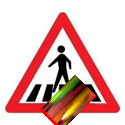

('adv_patch2.png', 135, (40, 75))


In [ ]:
bb = create_patch(combinations[30], crosswalk)
bb.show()
print(combinations[30])

In [ ]:
#to do: fix why it do that

In [ ]:
#make new folder
#create patch things for all
os.mkdir('patched')

In [ ]:
#create patched images + move to patch folder

i = 1
k = 0
for filename in os.scandir('images'):
  road_sign = Image.open(filename.path)
  road_sign = road_sign.resize((125,125))
  name='pch'+ str(i) +'.png'
  patched = create_patch(combinations[k], road_sign) #make patched image
  patched.save(name, 'png')
  new_path = 'patched/' + name
  shutil.move(name, new_path)
  if (i % 134 == 0): # for each combination
    k+=1
    if (k == 32):
      k = 0
    print(k)
  i+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
0
1
2
3
4


KeyboardInterrupt: ignored

In [ ]:
c=1
for filename in os.scandir('patched'):
    if filename.is_file():
      c += 1

print(c)

In [ ]:
c=1
for filename in os.scandir('images'):
    if filename.is_file():
      c += 1

print(c)

In [ ]:
parent = "/content/"
new_dir = "patchedtest"

path = os.path.join(parent, new_dir)
os.mkdir(path)

In [ ]:
f = 1
for filename in os.scandir('patched'):
  if filename.is_file():
    if f % 5 == 0:
      shutil.move(filename, 'patchedtest')
      print(str(filename) + "to test set")
    f += 1
    print(filename)

In [ ]:
c=1
for filename in os.scandir('patchedtest'):
    if filename.is_file():
      c += 1

print(c)

In [ ]:
c=1
for filename in os.scandir('patched'):
    if filename.is_file():
      c += 1

print(c)

In [ ]:
parent = "/content/"
new_dir = "cleantest"

path = os.path.join(parent, new_dir)
os.mkdir(path)

In [ ]:
f = 1
for filename in os.scandir('images'):
  if filename.is_file():
    if f % 5 == 0:
      shutil.move(filename, 'cleantest')
      print(str(filename) + "to test set")
    f += 1
    print(filename)

In [ ]:
c=1
for filename in os.scandir('cleantest'):
    if filename.is_file():
      c += 1

print(c)

In [ ]:
c=1
for filename in os.scandir('images'):
    if filename.is_file():
      c += 1

print(c)

6159


In [ ]:
os.mkdir('train')
os.mkdir('test')

In [ ]:
os.mkdir('patch_dataset')

In [ ]:
shutil.make_archive('patch_dataset', 'zip', 'patch_dataset')

In [ ]:
import random

In [ ]:
os.mkdir('valclean')

In [ ]:
#making a validation set

j = 0
cleanimgs = os.listdir('images')

for filename in cleanimgs:
  c = random.randint(0, 6158) #getting a random index
  filepath = cleanimgs[c].path
  name='valcl'+ str(j) +'.png'
  new_path = 'valclean/' + name
  shutil.move(name, new_path)

